In [1]:
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
i=0
data=np.zeros((len(x)*len(y),2))
for row in range(len(x)):
    for col in range(len(y)):
        data[i,0]=x[row]
        data[i,1]=y[col]
        i+=1
data

array([[-10. , -10. ],
       [-10. ,  -9.9],
       [-10. ,  -9.8],
       ...,
       [  9.9,   9.7],
       [  9.9,   9.8],
       [  9.9,   9.9]])

In [3]:
target = (np.sin(data[:,0])/data[:,0])*(np.sin(data[:,1])/data[:,1])
X_train, X_test, target_train, target_test = train_test_split(data, target, test_size=0.75, random_state=1)

help --> https://scikitlearn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

In [12]:
#solver{‘lbfgs’, ‘sgd’, ‘adam’}
mlp_model= MLPRegressor(hidden_layer_sizes=(10,10),max_iter=100 ,solver='adam',early_stopping=True,validation_fraction=0.1)
mlp_model.fit(X_train,target_train)
pred_train= mlp_model.predict(X_train)
print(f'prediction of train={metrics.mean_squared_error(target_train, pred_train)}')
pred_test= mlp_model.predict(X_test)
print(f'prediction of test={metrics.mean_squared_error(target_test, pred_test)}')

prediction of train=0.0027077364050478747
prediction of test=0.002724849586053272


C:\Users\Sharif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


# Plot pred_ target 

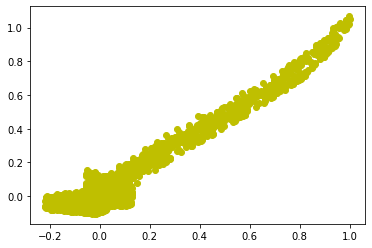

In [13]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(target_train,pred_train, color = 'y')
plt.show()

# Plot Prediction

# Plot Function 

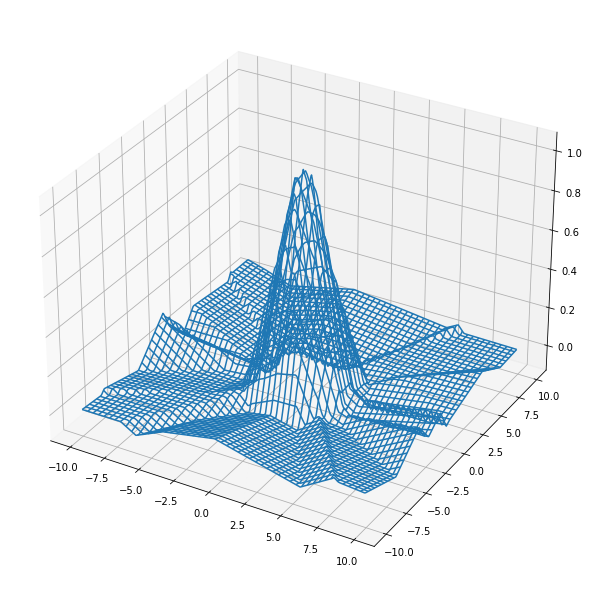

In [14]:
pred=mlp_model.predict(data)
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.plot_wireframe(data[:,0].reshape(len(x),len(x)),
                  data[:,1].reshape(len(x),len(x)),
                  pred.reshape(len(x),len(x)))
plt.show()

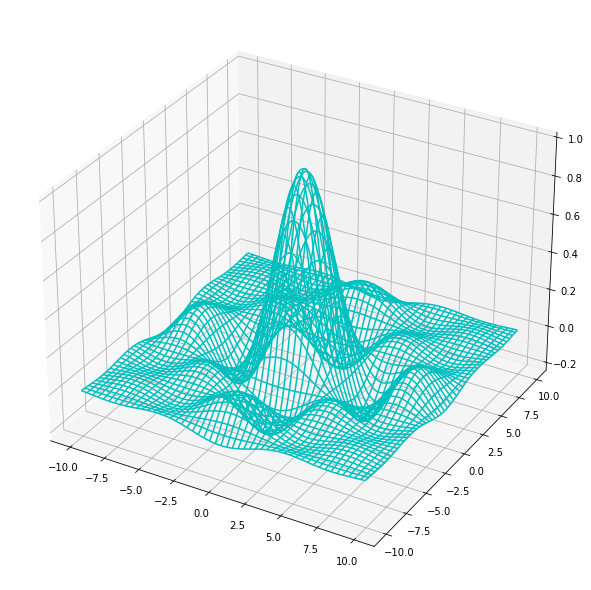

In [15]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.plot_wireframe(data[:,0].reshape(len(x),len(x)),
                  data[:,1].reshape(len(x),len(x)), 
                  target.reshape(len(x),len(x)),
                  color = 'c')
plt.show()